In [23]:
import pandas as pd

# Load file A
file_A = pd.read_csv('/mnt/data/macaulay/model_state2/A_metrics_epoch_1.csv')
file_A


,Epoch,Correlation_Coefficient,P_Value,Test_Loss,MAE,RMSE,R2_Score
0,1.01000,-0.088648,0.641335,0.018503,0.108274,0.136026,-0.037586
1,1.02000,-0.003129,0.986908,0.016744,0.099373,0.129397,-0.022493
2,1.03000,0.421335,0.020405,0.028278,0.123481,0.168160,-0.010446
3,1.04000,0.026658,0.888793,0.026225,0.123423,0.161942,-0.170475
4,1.05000,0.471393,0.008550,0.022564,0.114767,0.150212,-0.064244
...,...,...,...,...,...,...,...
17538,1.17539,-0.193002,0.306854,0.020061,0.118405,0.141637,-0.017239
17539,1.17540,-0.100926,0.595653,0.017925,0.106227,0.133883,-0.036437
17540,1.17541,0.036925,0.846396,0.022256,0.100546,0.149184,-0.005460
17541,1.17542,-0.086655,0.648878,0.015169,0.093909,0.123161,-0.054003


In [24]:
# Load file B
file_B = pd.read_csv('/mnt/data/macaulay/model_state2/B_metrics_epoch_1.csv')
file_B


,Epoch,Correlation_Coefficient,P_Value,Test_Loss,MAE,RMSE,R2_Score
0,1.01,0.005252,0.870172,0.017677,0.105424,0.133580,-0.008970
1,1.02,-0.001742,0.956754,0.017075,0.103684,0.130569,-0.000003
2,1.03,0.044521,0.165684,0.019641,0.108519,0.141054,-0.001699
3,1.04,-0.007887,0.806117,0.017365,0.104584,0.131575,-0.007317
4,1.05,0.000993,0.975347,0.018104,0.105447,0.134750,-0.009518
...,...,...,...,...,...,...,...
95,1.96,-0.002227,0.944735,0.017827,0.104793,0.134255,-0.014151
96,1.97,0.000059,0.998531,0.018360,0.105738,0.136100,-0.003741
97,1.98,0.010408,0.745996,0.018827,0.108555,0.136773,-0.031192
98,1.99,0.049387,0.124073,0.018955,0.105094,0.137632,-0.009433


In [25]:
# Load file C
file_C = pd.read_csv('/mnt/data/macaulay/model_state2/C_metrics_epoch_1.csv')
file_C


,Epoch,Correlation_Coefficient,P_Value,Test_Loss,MAE,RMSE,R2_Score
0,1.01,-0.173122,0.360259,0.014469,0.098213,0.120288,-0.005659
1,1.02,0.151929,0.422865,0.014446,0.100215,0.120193,-0.003978
2,1.03,0.027643,0.884712,0.020072,0.105639,0.141676,-0.045433
3,1.04,-0.009811,0.958963,0.024924,0.113577,0.157875,-0.008580
4,1.05,0.173215,0.359999,0.013282,0.090802,0.115247,-0.041794
...,...,...,...,...,...,...,...
95,1.96,-0.127880,0.500670,0.020001,0.104372,0.141424,-0.025918
96,1.97,-0.360116,0.050610,0.017728,0.106823,0.133147,-0.002708
97,1.98,-0.092124,0.628261,0.013836,0.088140,0.117628,-0.001074
98,1.99,-0.063206,0.740029,0.025357,0.127924,0.159239,-0.025054


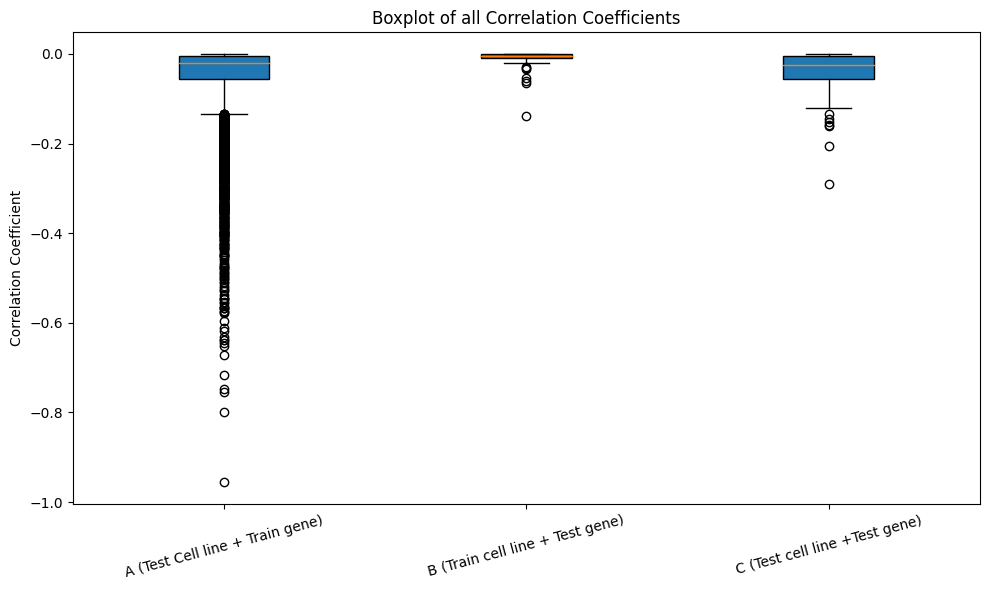

In [26]:
import matplotlib.pyplot as plt

# Data for boxplot
data = [file_A["R2_Score"], file_B["R2_Score"], file_C["R2_Score"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=True, patch_artist=True, labels=['A (Test Cell line + Train gene)', 
                                                       'B (Train cell line + Test gene)', 
                                                       'C (Test cell line +Test gene)'])
plt.title('Boxplot of all Correlation Coefficients')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


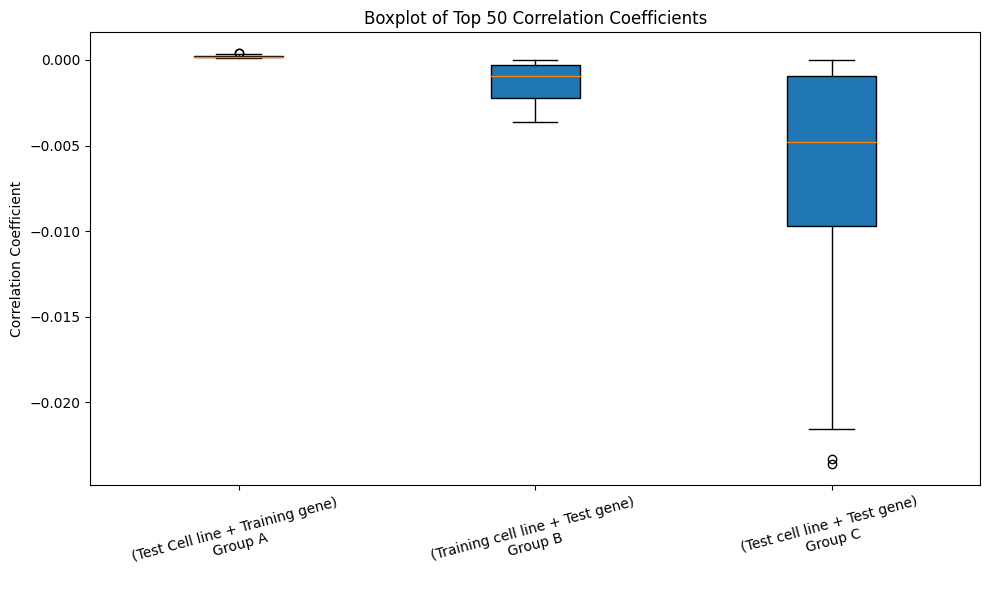

In [27]:
import matplotlib.pyplot as plt



# Extract the top 50 correlated values for each file
top_50_A = file_A.nlargest(50, 'R2_Score')
top_50_B = file_B.nlargest(50, 'R2_Score')
top_50_C = file_C.nlargest(50, 'R2_Score')

top_50_A["R2_Score"].describe()
# Data for boxplot
data_top_50 = [top_50_A["R2_Score"], top_50_B["R2_Score"], top_50_C["R2_Score"]]

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot(data_top_50, vert=True, patch_artist=True, labels=['(Test Cell line + Training gene) \nGroup A', 
                                                              '(Training cell line + Test gene)\nGroup B ', 
                                                              '(Test cell line + Test gene)\nGroup C'])
plt.title('Boxplot of Top 50 Correlation Coefficients')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=15)
plt.tight_layout()

plt.show()


In [28]:
# Load the gene metadata file
gene_metadata1 = pd.read_csv('/mnt/data/macaulay/datas/processed_gene_embeddings.csv')

#gene_metadata1 = pd.read_csv('datas/processed_gene_embeddings.csv')
gene_metadata = gene_metadata1[['Gene']]

gene_metadata = gene_metadata.iloc[100:]
gene_metadata.reset_index(inplace=True)
gene_metadata.drop('index', axis=1, inplace=True)
gene_metadata


,Gene
0,ZFX
1,LAMP2
2,ITGA2B
3,ASB4
4,GDE1
...,...
17538,TMEM247
17539,EEF1AKMT4
17540,TBCE
17541,CCDC39


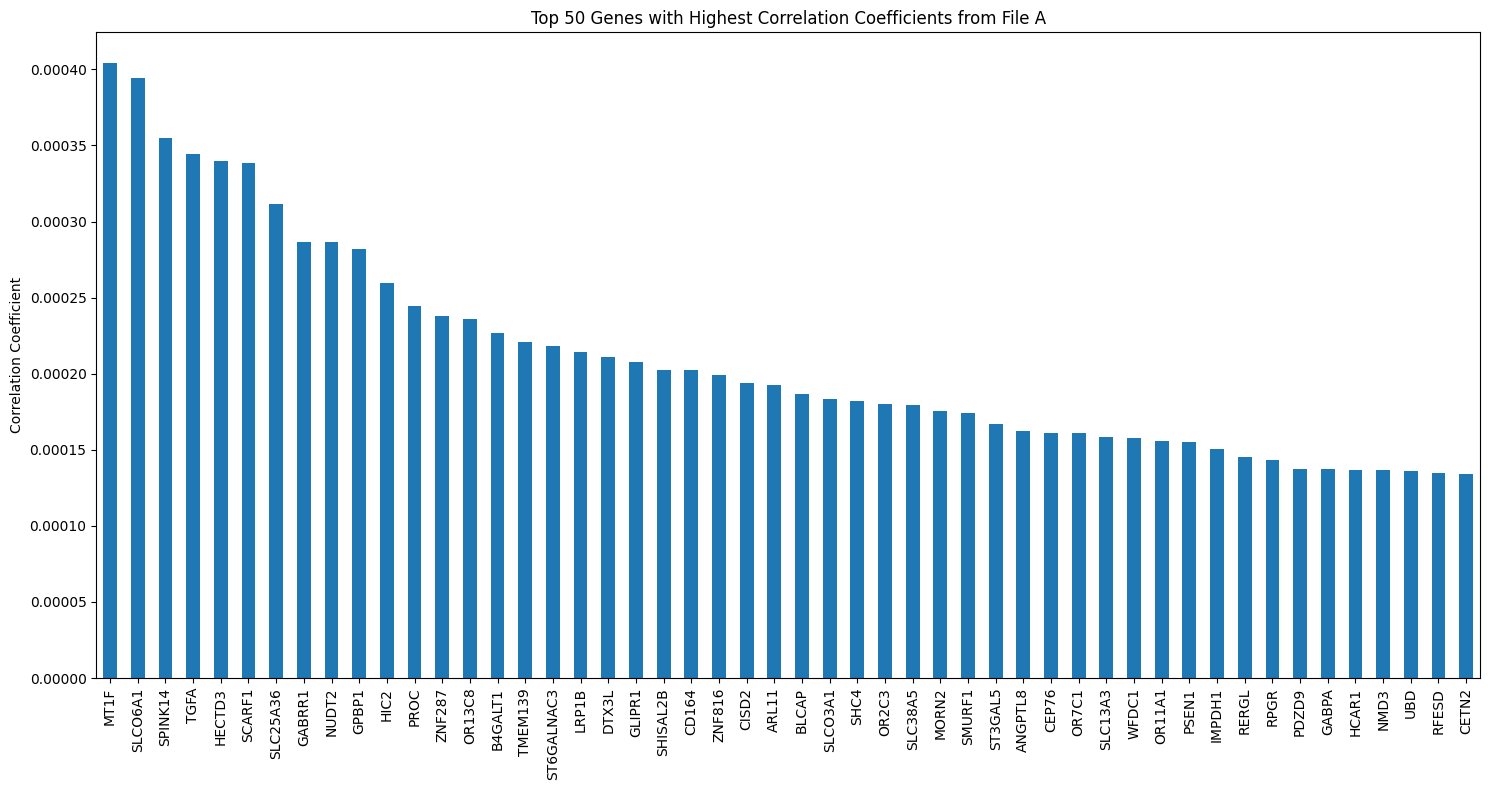

In [29]:
file_A = pd.concat([file_A, gene_metadata], axis=1)



# Map indices of File A to gene names from metadata
#file_A["Gene"] = file_A.index.map(gene_metadata.squeeze())

# Sort File A by absolute correlation coefficients and select top 50
top_50_genes_A = file_A.nlargest(50, 'R2_Score', 'all')

# Plotting
plt.figure(figsize=(15, 8))
top_50_genes_A["R2_Score"].plot(kind='bar')
plt.xticks(range(50), top_50_genes_A["Gene"], rotation=90)
plt.ylabel('Correlation Coefficient')
plt.title('Top 50 Genes with Highest Correlation Coefficients from File A')
plt.tight_layout()

plt.show()


In [30]:
file_A

,Epoch,Correlation_Coefficient,P_Value,Test_Loss,MAE,RMSE,R2_Score,Gene
0,1.01000,-0.088648,0.641335,0.018503,0.108274,0.136026,-0.037586,ZFX
1,1.02000,-0.003129,0.986908,0.016744,0.099373,0.129397,-0.022493,LAMP2
2,1.03000,0.421335,0.020405,0.028278,0.123481,0.168160,-0.010446,ITGA2B
3,1.04000,0.026658,0.888793,0.026225,0.123423,0.161942,-0.170475,ASB4
4,1.05000,0.471393,0.008550,0.022564,0.114767,0.150212,-0.064244,GDE1
...,...,...,...,...,...,...,...,...
17538,1.17539,-0.193002,0.306854,0.020061,0.118405,0.141637,-0.017239,TMEM247
17539,1.17540,-0.100926,0.595653,0.017925,0.106227,0.133883,-0.036437,EEF1AKMT4
17540,1.17541,0.036925,0.846396,0.022256,0.100546,0.149184,-0.005460,TBCE
17541,1.17542,-0.086655,0.648878,0.015169,0.093909,0.123161,-0.054003,CCDC39


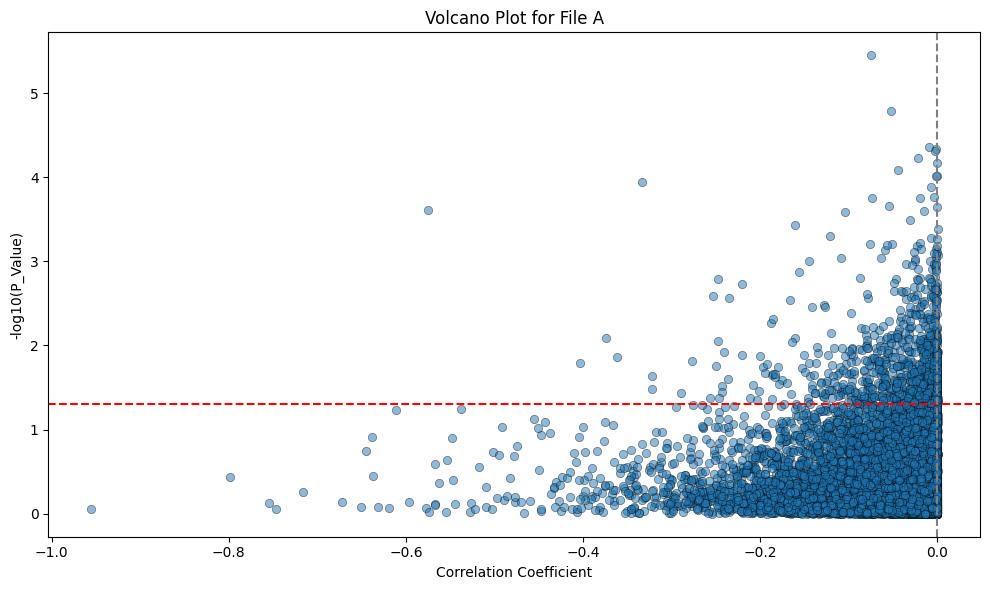

In [31]:
import numpy as np

# Calculate -log10 of the P_Value
file_A["-log10_P_Value"] = -np.log10(file_A["P_Value"])

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(file_A["R2_Score"], file_A["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.title('Volcano Plot for File A')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # Significance threshold
plt.axvline(x=0, color='gray', linestyle='--')
plt.tight_layout()

plt.show()


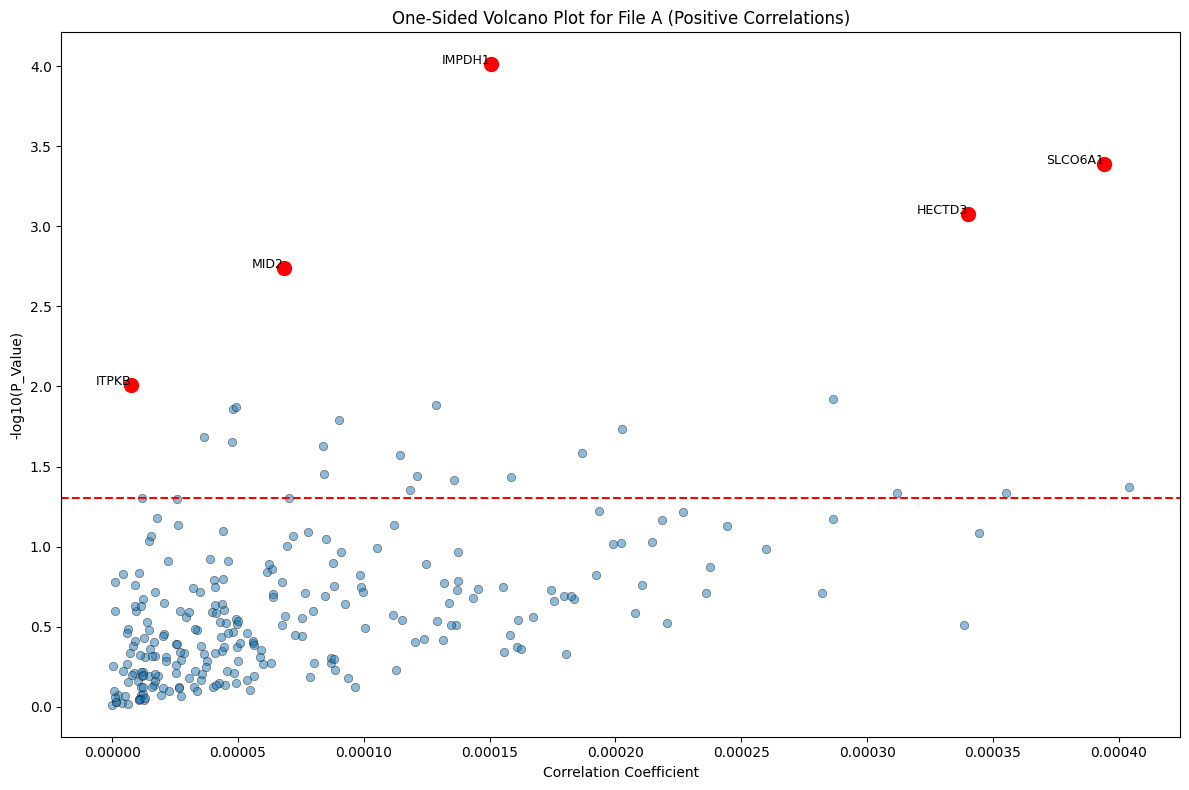

In [32]:
# Filter for positive correlation coefficients
one_sided_data = file_A[file_A["R2_Score"] > 0]

# Sort by significance and select top 5
top_5_genes = one_sided_data.nsmallest(5, 'P_Value')

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(one_sided_data["R2_Score"], one_sided_data["-log10_P_Value"], alpha=0.5, edgecolors="k", linewidth=0.5)
plt.scatter(top_5_genes["R2_Score"], top_5_genes["-log10_P_Value"], color='red', s=100)
plt.title('One-Sided Volcano Plot for File A (Positive Correlations)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('-log10(P_Value)')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')  # Significance threshold

# Annotate the top 5 genes
for _, row in top_5_genes.iterrows():
    plt.annotate(row["Gene"], (row["R2_Score"], row["-log10_P_Value"]), fontsize=9, ha='right')

plt.tight_layout()
plt.show()


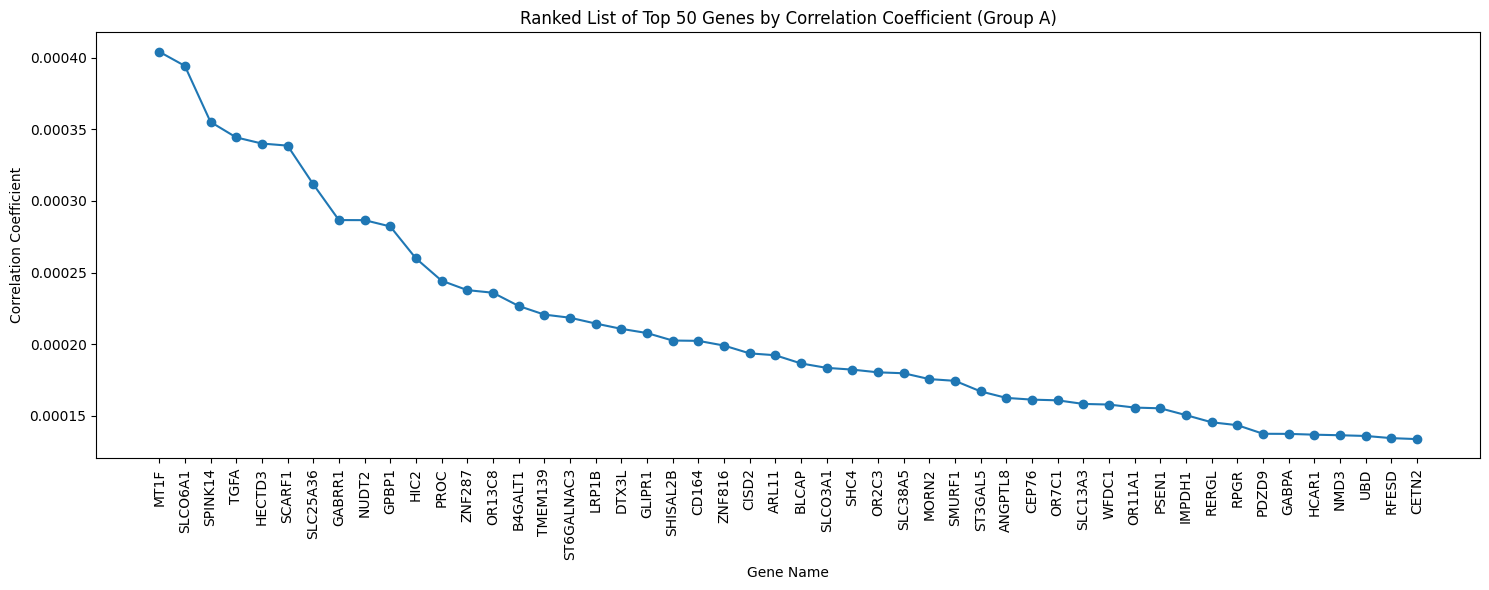

In [33]:
# Rank genes by absolute correlation coefficient and select top 100
top_100_genes_ranked = file_A.nlargest(50, 'R2_Score', 'all')

# Plotting
plt.figure(figsize=(15, 6))
plt.plot(top_100_genes_ranked["Gene"], top_100_genes_ranked["R2_Score"], marker='o', linestyle='-')
plt.xticks(rotation=90)
plt.xlabel('Gene Name')
plt.ylabel('Correlation Coefficient')
plt.title('Ranked List of Top 50 Genes by Correlation Coefficient (Group A)')
plt.tight_layout()

plt.show()
